In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/johnson-and-johnson.csv")

train = df[:-4]
test = df[-4:]

historical_mean = np.mean(train.data)
print(historical_mean)

pred_hist_mean = pd.DataFrame()
pred_hist_mean["date"] = test.date
pred_hist_mean["pred"] = historical_mean

pred_hist_mean

# MAPE = mean average percentage error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true- y_pred) / y_true)) * 100

mape_hist_mean = mape(test.data, pred_hist_mean.pred)

print(mape_hist_mean)

4.308499987499999
70.00752579965119


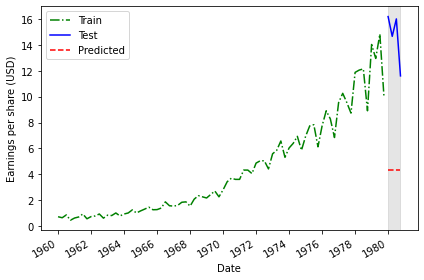

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train.date, train.data, "g-.", label="Train")
ax.plot(test.date, test.data, "b-", label="Test")
ax.plot(pred_hist_mean.date, pred_hist_mean.pred, "r--", label="Predicted")
ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share (USD)")
ax.axvspan(80, 83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968,
                                 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

12.96
15.5963680725103


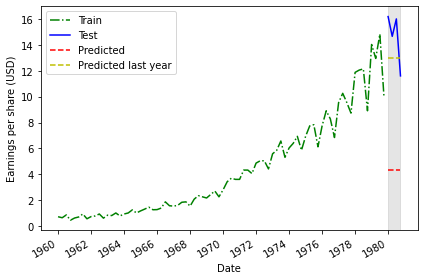

In [46]:
last_year_mean = np.mean(train.data[-4:])
print(last_year_mean)

pred_last_year_mean = pd.DataFrame()
pred_last_year_mean["date"] = test.date
pred_last_year_mean["pred"] = last_year_mean

mape_last_year_mean = mape(test.data, pred_last_year_mean.pred)
print(mape_last_year_mean)

ax.plot(pred_hist_mean.date, pred_last_year_mean.pred, "y--", label="Predicted last year")
ax.legend(loc=2)

fig

9.99
30.457277908606535


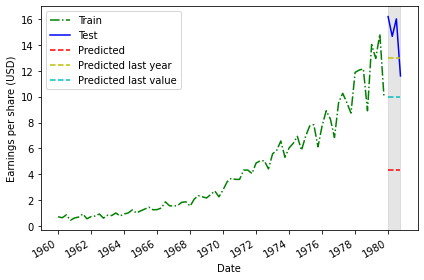

In [47]:
last = train.data.iloc[-1]
print(last)

pred_last = pd.DataFrame()
pred_last["date"] = test.date
pred_last["pred"] = last

mape_last = mape(test.data, pred_last.pred)
print(mape_last)

ax.plot(pred_hist_mean.date, pred_last.pred, "c--", label="Predicted last value")
ax.legend(loc=2)

fig

11.561658552433654


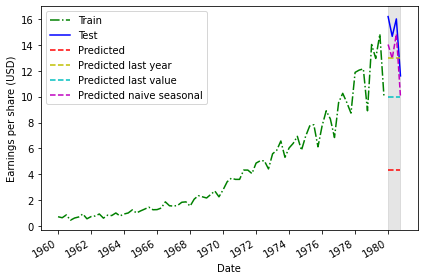

In [50]:
pred_naive_seasonal = pd.DataFrame()
pred_naive_seasonal["date"] = test.date
pred_naive_seasonal["pred"] = train.data[-4:].values

mape_naive_seasonal = mape(test.data, pred_naive_seasonal.pred)
print(mape_naive_seasonal)

ax.plot(pred_hist_mean.date, pred_naive_seasonal.pred, "m--", 
        label="Predicted naive seasonal")
ax.legend(loc=2)

fig

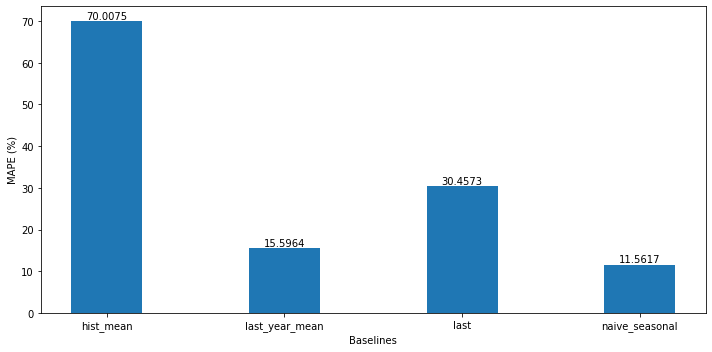

In [68]:
fig2, ax2 = plt.subplots(figsize = (10,5))

ax2.bar(["hist_mean", "last_year_mean", "last", "naive_seasonal"],
        [mape_hist_mean, mape_last_year_mean, mape_last, mape_naive_seasonal],
        width=0.4)
ax2.set_xlabel("Baselines")
ax2.set_ylabel("MAPE (%)")
ax2.bar_label(ax2.containers[0])
plt.tight_layout()